# ディープラーニング入門

## 単純パーセプトロンを理解する。


<img src="perceptron.png"/>


この図はニューロン間の情報の伝達を表現していて、前のニューロンからの入力信号に対して自分である信号を加算し、そしてその演算結果がある閾値を超えると、次のニューロンに電気信号を送るという仕組みを表現しています。

これは次にように表現されることもあります。

<img src="dl1.png?ssl=1"/>


ここで$x_1$、$x_2$は入力、$w_1$、$w_2$は重みを表し、その総量は

$ w_1 x_1 + w_2 x_2 $　　

で表されます。

つぎにニューロンに信号を送る閾値を$\theta$と置くと

\begin{cases}
    1 \ \ \ \ \ w_1 x_1 + w_2 x_2 \ge \theta \\
    0 \ \ \ \ \ w_1 x_1 + w_2 x_2 < \theta
\end{cases}

入力の数が2つあると複雑なので1つで考えてみましょう。

\begin{cases}
    1 \ \ \ \ w_1 x_1  \ge \theta \\
    0 \ \ \ \ w_1 x_1  < \theta
\end{cases}

この関係を利用して論理回路として考えることができます。

## これをどうしても脳とつなげたい人のために

<img src="https://thinkit.co.jp/sites/default/files/article_node/neuron_with_eq.png"/>

## ニューラルネットワークプレイグラウンド

まずは訳が分からなくてもいろいろいじってみるのに便利なサイト


http://playground.tensorflow.org/

https://hinaser.github.io/Machine-Learning/index.html#batchsize-part

## 論理回路

人間の脳では情報をアナログで処理しているのでアナログ回路だと考えられますが、信号をデジタル化して処理することも可能で、そのような回路をデジタル回路と呼びます。デジタル回路では、情報を0か1の2値の信号として制御しています。そして、このような場合に論理ゲートいう回路を用いて、さらに複雑な回路を構築していきます。論理ゲートの基本は3つあり、

    NOT ゲート(論理否定)  　　- 線形単回帰を利用した分類
    AND ゲート(論理積)  　　　- 線形多重回帰を利用した分類
    OR ゲート(論理和)  　 　　- 線形多重回帰を利用した分類
    NAND ゲート(比例論理積)   - 線形多重回帰を利用した分類
    XOR ゲート(排他的論理和)  - 非線形多重回帰を利用した分類
    
そしてこれら3つを組わせて複雑な回路を構成していきます。

## NOTゲート

<img src="http://semiconductor.seesaa.net/image/07a29fd8b973c5f03460b24751d556de.gif"/>



In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [22]:
'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=1, units=1),  # Keras 1
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

'''
モデル学習
'''
# NOTゲート
X = np.array([[0], [1]])
Y = np.array([[1], [0]])

model.fit(X, Y, epochs=400, batch_size=1,verbose=0)  # Keras 1

'''
学習結果の確認
'''
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('predicted class:')
print(classes)
print()
print('classified:')
print(Y == classes)
print()
print('output probability:')
print(prob)

1/2 [==============>...............] - ETA: 0spredicted class:
[[1]
 [0]]

classified:
[[ True]
 [ True]]

output probability:
[[ 0.91850311]
 [ 0.05388337]]


In [4]:
print(model.layers[0].get_weights()[0],model.layers[0].get_weights()[1])

[[-5.23414469]] [ 2.39543653]


### predict_classes

predict_classes(self, x, batch_size=32, verbose=1)
バッチごとに入力サンプルに対するクラスの予測を生成します．

入力サンプルごとにバッチごとに処理します．

引数

- x: 入力データ，Numpy 配列または Numpy 配列のリスト（モデルに複数の入力がある場合）．
- batch_size: 整数．
- verbose: 進行状況メッセージ出力モード，0または1．
- 戻り値

属するクラスの予測を格納した Numpy 配列．

### predict_proba

predict_proba(self, x, batch_size=32, verbose=1)
入力サンプルの各々のクラスの所属確率を生成します．

入力サンプルごとにバッチごとに処理します．

引数

- x: 入力データ，Numpy 配列または Numpy 配列のリスト（モデルに複数の入力がある場合）．
- batch_size: 整数．
- verbose: 進行状況メッセージ出力モード，0または1．
- 戻り値

確率の予測値を格納した Numpy 配列．

### ANDゲート

<img src="http://www.atmarkit.co.jp/icd/root/images/23528379.gif">

<img src="http://www.it-passport.org/category/technology-calculation/Images/IPH242082-01.png"/>

ではkerasを使ってこの$w_1$、$w_2$、$\theta$を求めてみましょう。

まずは必要なライブラリをインポートします。

つぎに
```
np.random.seed()
```
により毎回同じ乱数が出るようにします。()の数値はなんでもＯＫです。

In [5]:
np.random.seed(0)  # 乱数シード

モデルの設定では、層の積み重ねと、その種類(Dense等)、そして活性化関数(Activation)などを指定します。

In [6]:
'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=2, units=1),  # Keras 1
    Activation('sigmoid')
])

compileメソッドにより学習の処理の方法を指定します。3つの引数を取ります。  
    最適化アルゴリズム(optimizer)  
    損失関数(loss)  
    評価関数(metrics)  


In [7]:
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

学習に必要なデータを用意します。ここではXは入力データ、Yは出力データです。

In [8]:
'''
モデル学習
'''
# ANDゲート
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

モデルを与えられたデータにより訓練します。  
ここでは  
    * エポック数(nb_epoch):  データ全体に対する反復回数    
    * バッチサイズ(batch_size):  N個のデータをM個の組に分けて学習する場合のMがバッチサイズです。  

を指定します。バッチサイズを1に指定すると、元データの分割を行わないことを意味します。  

また、verboseは進行状況をプリントアウトするかどうかを指定します。ゼロでプリントアウト無し、1でプリントアウトあり。

In [9]:
model.fit(X, Y, epochs=200, batch_size=1,verbose=0)  # Keras 1

学習結果の確認では
```
predict_classes
```
を用いて、各クラスの予測値をnumpy配列として出力します。
```
predict_proba
```
は与えられたデータの各クラスの確率を示します。

In [10]:
'''
学習結果の確認
'''
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

1/4 [======>.......................] - ETA: 0s

In [11]:
print('predicted class:')
print(classes)
print()
print('classified:')
print(Y == classes)
print()
print('output probability:')
print(prob)

predicted class:
[[0]
 [0]
 [0]
 [1]]

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.01142787]
 [ 0.16586943]
 [ 0.16168705]
 [ 0.76839834]]


In [12]:
print(model.layers[0].get_weights()[0],model.layers[0].get_weights()[1])

[[ 2.81447816]
 [ 2.84501791]] [-4.46020699]


## ORゲート

<img src="http://www.atmarkit.co.jp/icd/root/images/72356809.gif"/>

<img src="http://www.w3ii.com/computer_logical_organization/or_truthtable.jpg"/>

ANDゲートで用いたモデルの設定がすべて使えるので、データだけ入れ替えればＯＫです。


In [13]:
'''
モデル学習
'''
# ORゲート
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

model.fit(X, Y, epochs=400, batch_size=1,verbose=0)  # Keras 1

'''
学習結果の確認
'''
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('predicted class:')
print(classes)
print()
print('classified:')
print(Y == classes)
print()
print('output probability:')
print(prob)


1/4 [======>.......................] - ETA: 0spredicted class:
[[0]
 [1]
 [1]
 [1]]

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.0780637 ]
 [ 0.96900016]
 [ 0.96891677]
 [ 0.9999131 ]]


In [14]:
print(model.layers[0].get_weights()[0],model.layers[0].get_weights()[1])

[[ 5.90846062]
 [ 5.91123438]] [-2.46895099]


## XORゲート

<img src="http://www.atmarkit.co.jp/icd/root/images/46160543.gif"/>

<img src="http://www.ekouhou.net/%E5%A4%89%E8%AA%BF%E5%99%A8%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%EF%BC%91%E3%83%93%E3%83%83%E3%83%88%E4%BF%A1%E5%8F%B7%E5%A4%89%E6%8F%9B%E3%82%92%E7%94%A8%E3%81%84%E3%82%8B%EF%BC%A4%EF%BC%A3%E3%82%AA%E3%83%95%E3%82%BB%E3%83%83%E3%83%88%E9%99%A4%E5%8E%BB%E5%9B%9E%E8%B7%AF/A,2009-505450_000003.jpg"/>


In [15]:
'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=2, units=1),  # Keras 1
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

'''
データの生成
'''
# XORゲート
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

model.fit(X, Y, epochs=400, batch_size=1,verbose=0)  # Keras 

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

'''
学習結果の確認
'''
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('predicted class:')
print(classes)
print()
print('classified:')
print(Y == classes)
print()
print('output probability:')
print(prob)

1/4 [======>.......................] - ETA: 0spredicted class:
[[1]
 [0]
 [0]
 [0]]

classified:
[[False]
 [False]
 [False]
 [ True]]

output probability:
[[ 0.5040648 ]
 [ 0.49797806]
 [ 0.49625704]
 [ 0.49017146]]


In [16]:
print(model.layers[0].get_weights()[0],model.layers[0].get_weights()[1])

[[-0.03123157]
 [-0.02434741]] [ 0.01625957]


結果としてそれぞれのクラスの中の予測値で間違いがあるので、単純パーセプトロンではXORはモデル化できないことが分かります。



## 多層パーセプトロン

そこで層の数を増やしてみましょう。

<img src="https://openbook4.me/pictures/pics/000/001/104/medium/CNNArchitecture.jpg"/>

パーセプトロンが一層ではなく複数に積み重ねられているときを多層パーセプトロンと呼び、非線形の分類などに用いられています。

### XORゲート

XORゲートを実現できる論理回路の組み合わせは複数あります。

<img src="http://home.a00.itscom.net/hatada/dc2/chap06/image/xor02.png"/>

<img src="http://d3i5bpxkxvwmz.cloudfront.net/resized/images/remote/http_s.eeweb.com/quizzes/2010/4/22/nand-xor-circuit-1293061257_402_229.png"/>

<img src="http://livedoor.blogimg.jp/can_i_be_a_geek/imgs/e/c/ec691597.png"/>



In [27]:
'''
モデル設定
'''
model = Sequential([
    Dense(input_dim=2, units=1),  # Keras 1
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

'''
データの生成
'''
# XORゲート
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

隠れ層として層が一つ増えていますので、ここでモデルの層を増やす操作をします。


```
    add
```
を用いて層(レイヤー)を簡単に追加できます。入力と出力の数に注意してください。



In [28]:
'''
モデル設定
'''
model = Sequential()

# 入力層 - 隠れ層
model.add(Dense(input_dim=2, units=2))
model.add(Activation('sigmoid'))

# 隠れ層 - 出力層
model.add(Dense(output_dim=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

'''
モデル学習
'''
model.fit(X, Y, epochs=4000, batch_size=1,verbose=0)

'''
学習結果の確認
'''
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('predicted class:')
print(classes)
print()
print('classified:')
print(Y == classes)
print()
print('output probability:')
print(prob)

C:\Users\moriya\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


1/4 [======>.......................] - ETA: 0spredicted class:
[[0]
 [1]
 [1]
 [0]]

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.00764498]
 [ 0.99147308]
 [ 0.99139154]
 [ 0.01331981]]


In [31]:
print(model.layers[0].get_weights()[0],model.layers[0].get_weights()[1])

[[-6.80790806 -5.11684799]
 [-6.91529179 -5.13192654]] [ 2.84745502  7.62116575]


# ディープラーニング

<img src="https://s3-ap-northeast-1.amazonaws.com/prod-healthtechplus-wp-static/wp-content/uploads/2017/05/%E3%82%B9%E3%83%A9%E3%82%A4%E3%83%896-1.jpg"/>

# 
# 
# 


# CNN(Convolutional Neural Network)

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2016-11-08/f5f1beada9e269b2a7faed8dfe936919ac0c2397/1-Figure1-1.png"/>

# 
# 
# 

# Linear Regression Model by keras


1/8 [==>...........................] - ETA: 0s[[ 0.31037042]] [ 0.511244]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


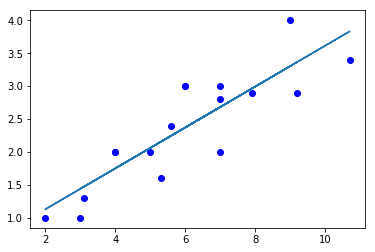

In [14]:
'''
A linear regression learning algorithm example using keras library.

'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

# Parameters
learning_rate = 0.01

# Training Data
train_X = np.asarray([3,4,5,6,7,4,9,6,7,2,7.0,10.7,5.3,7.9,5.6,9.2,3.1])#17
train_Y = np.asarray([1,2,2,3,2,2,4,3,3,1,2.8, 3.4,1.6,2.9,2.4,2.9,1.3])

# Test Data
test_X = np.asarray([7, 5, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([2, 2, 3.2, 2.83, 2.9, 3.2, 1.3, 1.0])

early_stopping = EarlyStopping(monitor='val_loss', patience=0, verbose=1)

model = Sequential()
model.add(Dense(input_dim=1,kernel_initializer='uniform',activation='linear',units=1))

model.compile(loss='mse', optimizer='rmsprop')

model.fit(
    train_X,
    train_Y,
    batch_size=1,
    epochs=1000,
    validation_data=(test_X,test_Y),
    #callbacks=[early_stopping],
    verbose=0)
classes=model.predict_classes(test_X,batch_size=1)
w=model.get_weights()[0]
b=model.get_weights()[1]
Y=w[0]*train_X+b
print(model.layers[0].get_weights()[0],model.layers[0].get_weights()[1])
plt.plot(train_X,train_Y,'bo')
plt.plot(train_X,Y)

print(model.summary())
#print(model.output)